/home/mastrelli/neural-astar/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


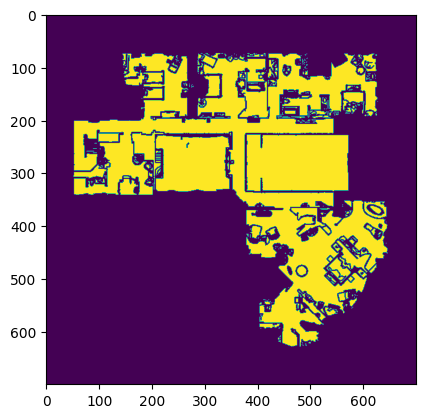

In [1]:
import numpy as np
import pytest
from PIL import Image
import torchvision.transforms as transforms
import os
import torch
import matplotlib.pyplot as plt


npz = np.load('/home/mastrelli/neural-astar/src/maps_npz//validation_ds.npz')

plt.imshow(npz['arr_0'][0][0])

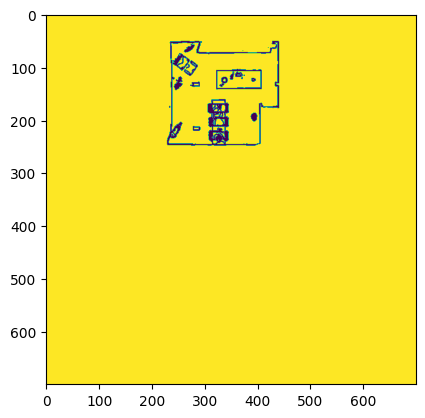

In [2]:
image = Image.open('/home/mastrelli/neural-astar/src/neural_astar/utils/voronoi_utilities/maps_data/maps/train_resized/house15_floor_3.png' )


transform = transforms.Compose([
        transforms.ToTensor()
    ])

image_tensor = transform(image) 
plt.imshow(image_tensor[0])

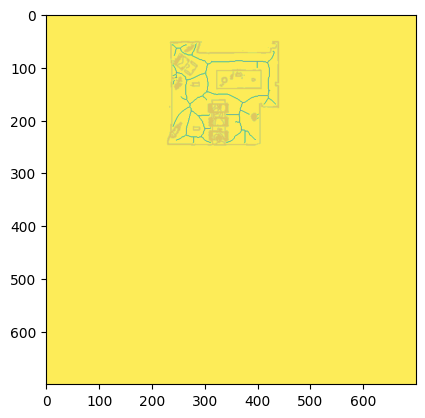

In [3]:


plt.imshow(image_tensor[0], alpha=0.4)
plt.imshow(voronoi_bitmap, alpha=0.6)


